# TRAINING AND TESTING A CLASSIFICATION MODEL ON THE generated.csv DATASET

Needed packages are imported. They include pandas, numpy, scikit-learn and seaborn(for when visualisations will be done). The k_nn module contains functions that use the K-Nearest Neighbor algorithm on the dataset. It is present as a file in the same directory as main.py

In [2]:
import sklearn
import seaborn as sns
import k_nn
from load_dataset import load_dataset
from sklearn.model_selection import train_test_split
import explore_data

The generated.csv dataset is loaded using pandas such that it translates into a pandas dataframe. The pathlib module is used in the load_dataset function to ensure that the file path works independent of the operating system on which the program is run.

In [3]:
filename = "generated.csv"
df = load_dataset(filename)

## Preprocessing
Preprocessing of the data in this study is done by changing the column names from integer values to strings. Also, the values in the target variable are changed from integer values to more descriptive strings in order to ease the understanding of the pair plot.

In [7]:
df.columns = ['feature0', 'feature1', 'feature2', 'feature3','label']

## Exploratory data analysis
EDA exploratory analysis of is principally carried out by two functions.The raw() function of the explore_data module provides a peep into the content of the dataset and its characteristics, while the graph_visualize function of that same module provides a visual platform to assess the dataset better.

In [8]:
explore_data.raw(df)

**************************************************HEAD**************************************************
   feature0  feature1  feature2  feature3  label
0 -0.525336  3.623456  1.680293  2.075983      0
1  9.534497 -8.348758  0.112068  6.815969      1
2  8.524880 -7.082612 -0.868522  5.211075      1
3  6.826851 -8.784989  0.090649  4.446359      1
4 -2.591003  5.138362  1.059329  1.319494      0
**************************************************TAIL**************************************************
       feature0  feature1  feature2  feature3  label
19995  6.590158 -8.562936  0.964792  5.984862      1
19996  8.715324 -7.847383 -0.415671  6.783874      1
19997  6.547144 -8.264512 -1.492629  5.186666      1
19998 -0.781900  4.160036  5.067404  8.881871      2
19999  0.296122  3.978478  1.358180  1.495554      0
**************************************************DESCRIBE**************************************************
           feature0      feature1      feature2      feature3        

* It is observed that there are four predictor variables and the target variable is called "label".
* All the predictor columns are observed to have the same number of non-null elements. Hence there are no missing values.
* All predictor variable values are of the same data type (float) and the target variable values are integer values. There are 20,000 observations.

#### Pair plot

In [17]:
explore_data.graph_visualize(df)

<Figure size 432x288 with 0 Axes>

There is perfect separation between the target values. 

#### Violin plot

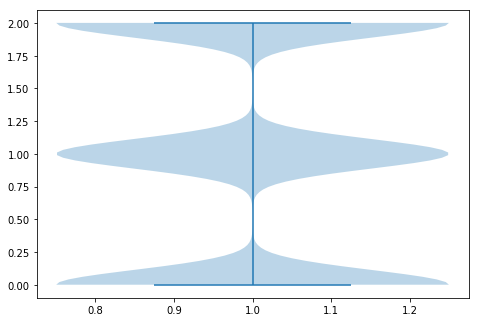

In [4]:
explore_data.violin_visualize(df)

The observation results are evenly distributed across the target values. This dataset is quite uniform.

### Choice of model based on Exploratory data analysis

In [10]:
df['label'].unique()

array([0, 1, 2])

The values of the target variable are known and discrete. Hence supervised learning is recommended, specifically classification models. Additionally, considering that the number of observations is less than 100,000 and the feature data is not text data, the k-nearest neighbor model is an appropriate algorithm for this dataset.

## Training and evaluating the KNN model on the generated.csv dataset

A demarcation is made between the predictor and data variables as shown below. The response variable "label" is assigned to a variable called target and the rest of the dataset, on which the "label" column is dependent, is assigned to a variable called data.

In [11]:
data = df.drop('label', axis = 1)
target =df['label']

The data (inclusive) is split into two sets; one which will be used to train a machine learning model  and the other which will be used to test the model.

In [12]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10, stratify = target)

In the k_nn.k_nearest function, a model is created and fitted using data_train and target_train. This model is used to predict the target values of data_test. Finally, the accuracy of the model is computed and returned by the function. When a test size of 0.30, and random_state of 10 was used, the accuracy of the K-NN model on the generated.csv dataset was observed to be 1.0.

In [13]:
kn_accuracy = k_nn.k_nearest(data_train, target_train, data_test, target_test)
print('The accuracy of the k nearest neighbours algorithm on this dataset is {}'.format(kn_accuracy))

The accuracy of the k nearest neighbours algorithm on this dataset is 1.0


A model complexity curve is plotted in order to visualise the variation between predicted values and actual values. Also, in a less ideal situation, the curve serves as a basis for chosing the value of the test_size parameter in order to get maximum prediction accuracy.

The behaviour of the predicted values with respect to the actual values is as shown below:


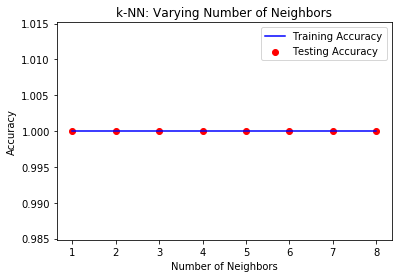

In [14]:
print('The behaviour of the predicted values with respect to the actual values is as shown below:')
k_nn.visual_compare(data_train, target_train, data_test, target_test)

The predictions of the k-nearest neighbor model on the generated.csv dataset are totally correct. There is no deviation.